In [10]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Fig N-b

In [11]:
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

In [12]:
import matplotlib as mpl

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 9))

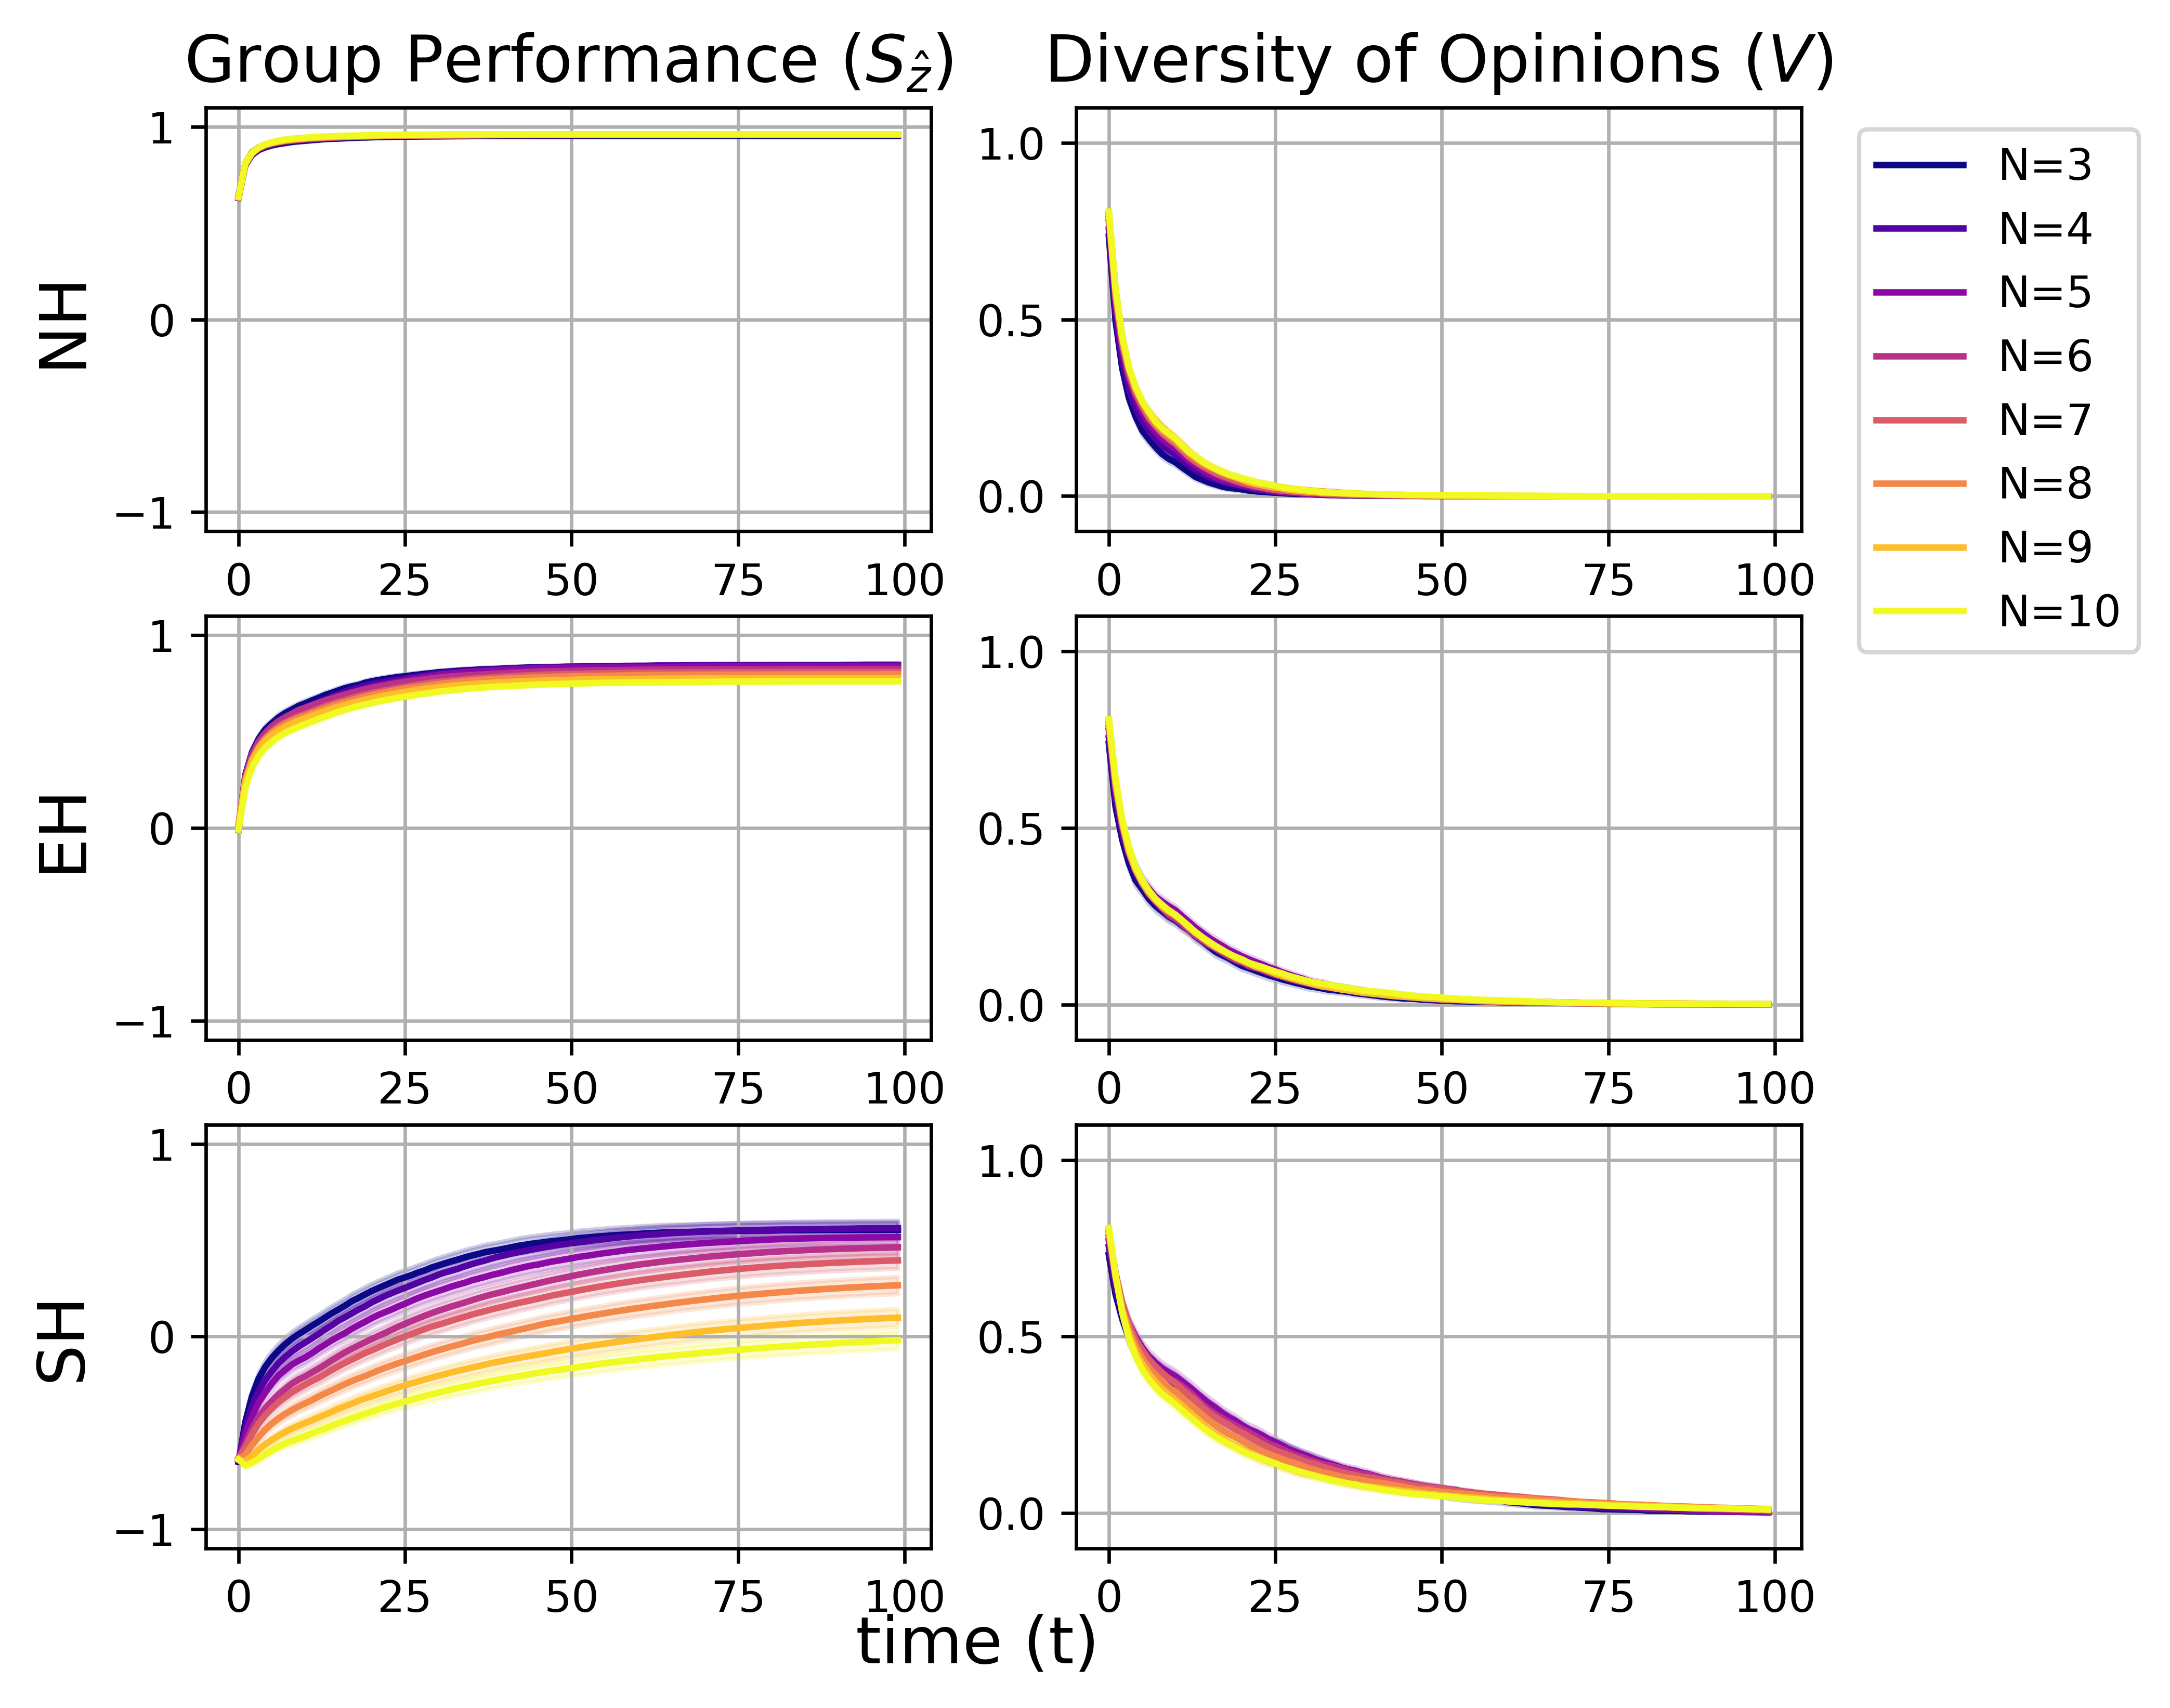

In [6]:
fig,axs = plt.subplots(3,2,figsize=(6.6,6), dpi=600)

t = np.arange(0, MC_step)

for i in range(3):
  axs[i, 0].set_ylim([-1.1,1.1])
  axs[i, 0].set_yticks([1,0,-1])
  axs[i, 1].set_ylim([-0.1,1.1])
  axs[i, 1].set_yticks([0,0.5,1])

    
# NH
config='NH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[0, 0].set_ylabel("NH", fontsize=15)
axs[0, 0].set_title(r'Group Performance ($S_\hat{z}$)', fontsize=15)
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 0].plot(t, Savg, '-', color=colors[i])
  axs[0, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[0, 0].grid()

axs[0, 1].set_title(r'Diversity of Opinions ($V$)', fontsize=15)
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 1].plot(t, Vavg, '-', color=colors[i], label= f'N={N}')
  axs[0, 1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[0, 1].grid()


# EH
config='EWH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[1, 0].set_ylabel("EH", fontsize=15)
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 0].plot(t, Savg, '-', color=colors[i])
  axs[1, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[1, 0].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 1].plot(t, Vavg, '-', color=colors[i])
  axs[1, 1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[1, 1].grid()


# SH
config='SH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[2, 0].set_ylabel("SH", fontsize=15)
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 0].plot(t, Savg, '-', color=colors[i])
  axs[2, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[2, 0].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 1].plot(t, Vavg, '-', color=colors[i])
  axs[2, 1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[2, 1].grid()

fig.suptitle("time (t)", fontsize=15, y = 0.075)
axs[0, 1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

#plt.savefig('Fig6_b.png', bbox_inches = 'tight')
#plt.savefig('Fig6_b.pdf', bbox_inches = 'tight')

In [ ]:
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

In [13]:
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}

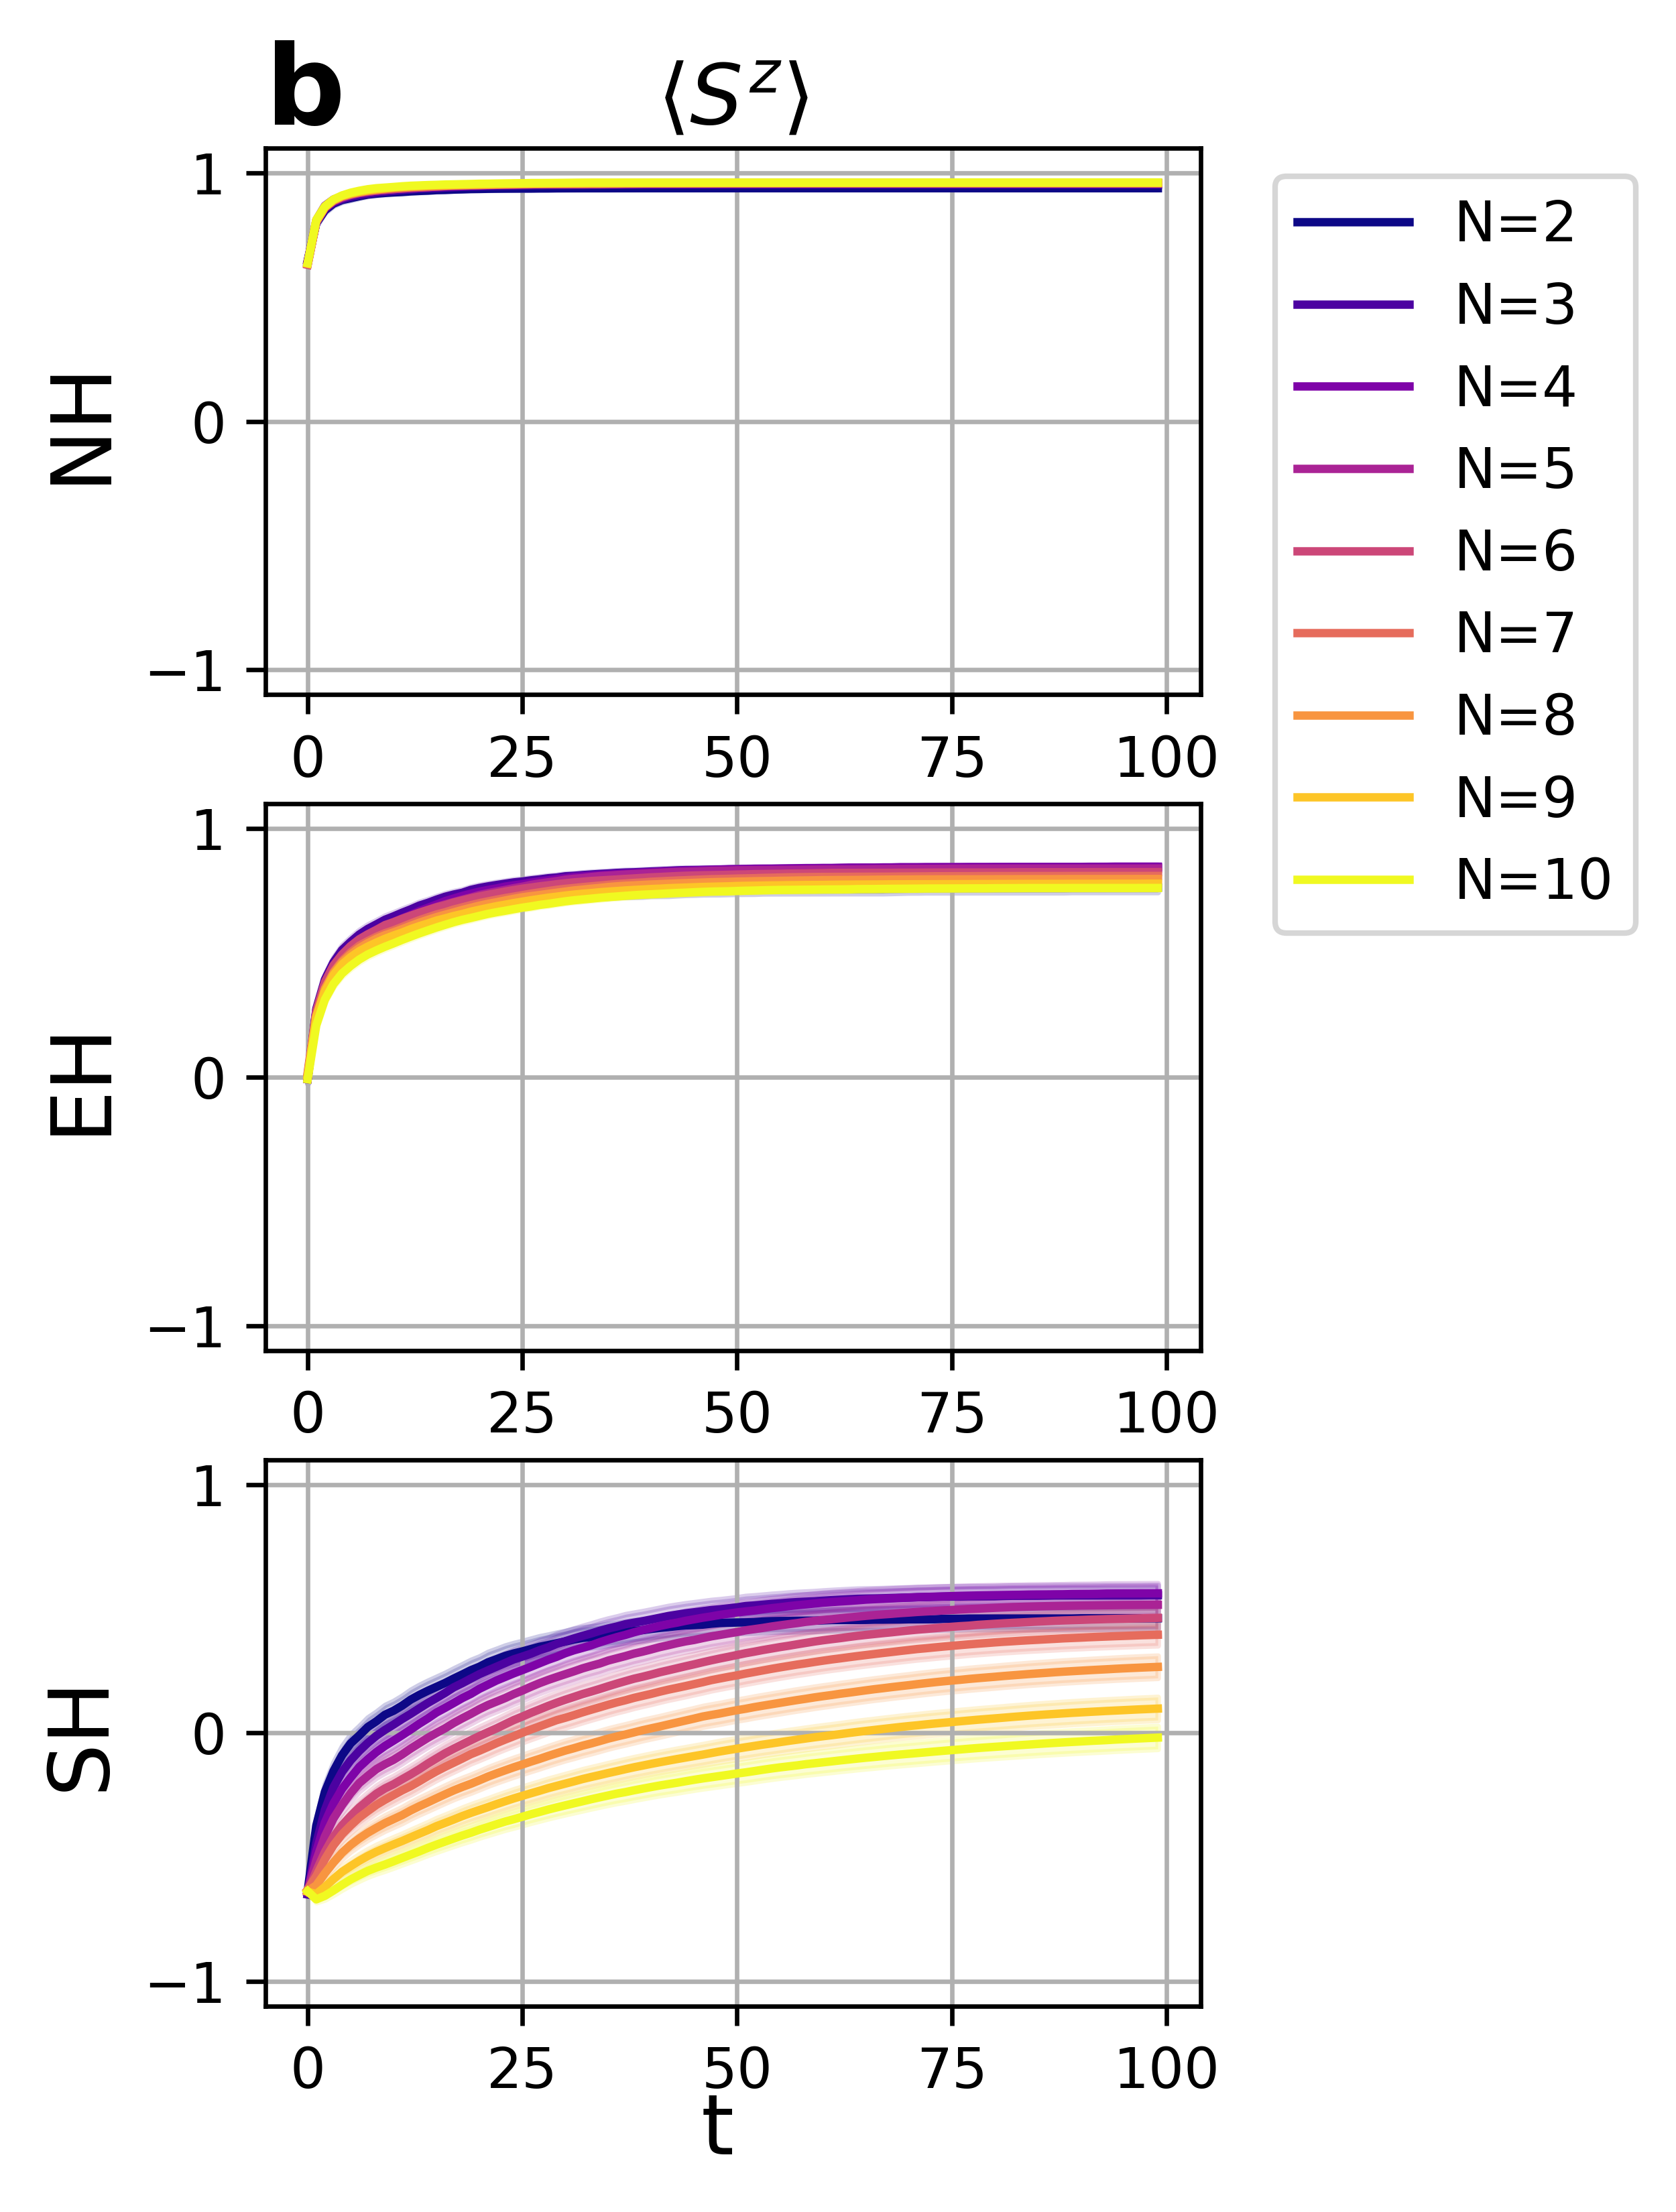

In [14]:
fig,axs = plt.subplots(3,1,figsize=(3,6), dpi=600)

t = np.arange(0, MC_step)

for i in range(3):
  axs[i].set_ylim([-1.1,1.1])
  axs[i].set_yticks([1,0,-1])
    
# NH
config='NH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([2,3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[0].set_ylabel("NH", fontsize=15)
axs[0].set_title(r'$\langle S^z \rangle$', fontsize=15)
for i, N in enumerate([2,3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', color=colors[i], label= f'N={N}')
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[0].grid()

# EH
config='EWH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([2,3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[1].set_ylabel("EH", fontsize=15)
for i, N in enumerate([2,3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1].plot(t, Savg, '-', color=colors[i])
  axs[1].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[1].grid()

# SH
config='SH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([2,3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

axs[2].set_ylabel("SH", fontsize=15)
for i, N in enumerate([2,3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Savg, '-', color=colors[i])
  axs[2].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[2].grid()

fig.suptitle("t", fontsize=15, y = 0.075)
axs[0].set_title('b', fontdict=title_font, loc='left', pad=-5)
axs[0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

#plt.savefig('Fig6_b.png', bbox_inches = 'tight')
#plt.savefig('Fig6_b.pdf', bbox_inches = 'tight')

# FigN-a

In [15]:
alpha = 0.5   
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

In [16]:
title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}

In [17]:
NH_avg = []
NH_std = []
config = 'NH'
for N in [2,3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  NH_avg.append(lst[-1, :, :,2].mean(1).mean())
  NH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))
    
AR_avg = []
AR_std = []
config = 'EWH'
for N in [2,3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  AR_avg.append(lst[-1, :, :,2].mean(1).mean())
  AR_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

SH_avg = []
SH_std = []
config = 'SH'
for N in [2,3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

In [18]:
NH_avg = np.array(NH_avg)
NH_std = np.array(NH_std)

AR_avg = np.array(AR_avg)
AR_std = np.array(AR_std)

SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

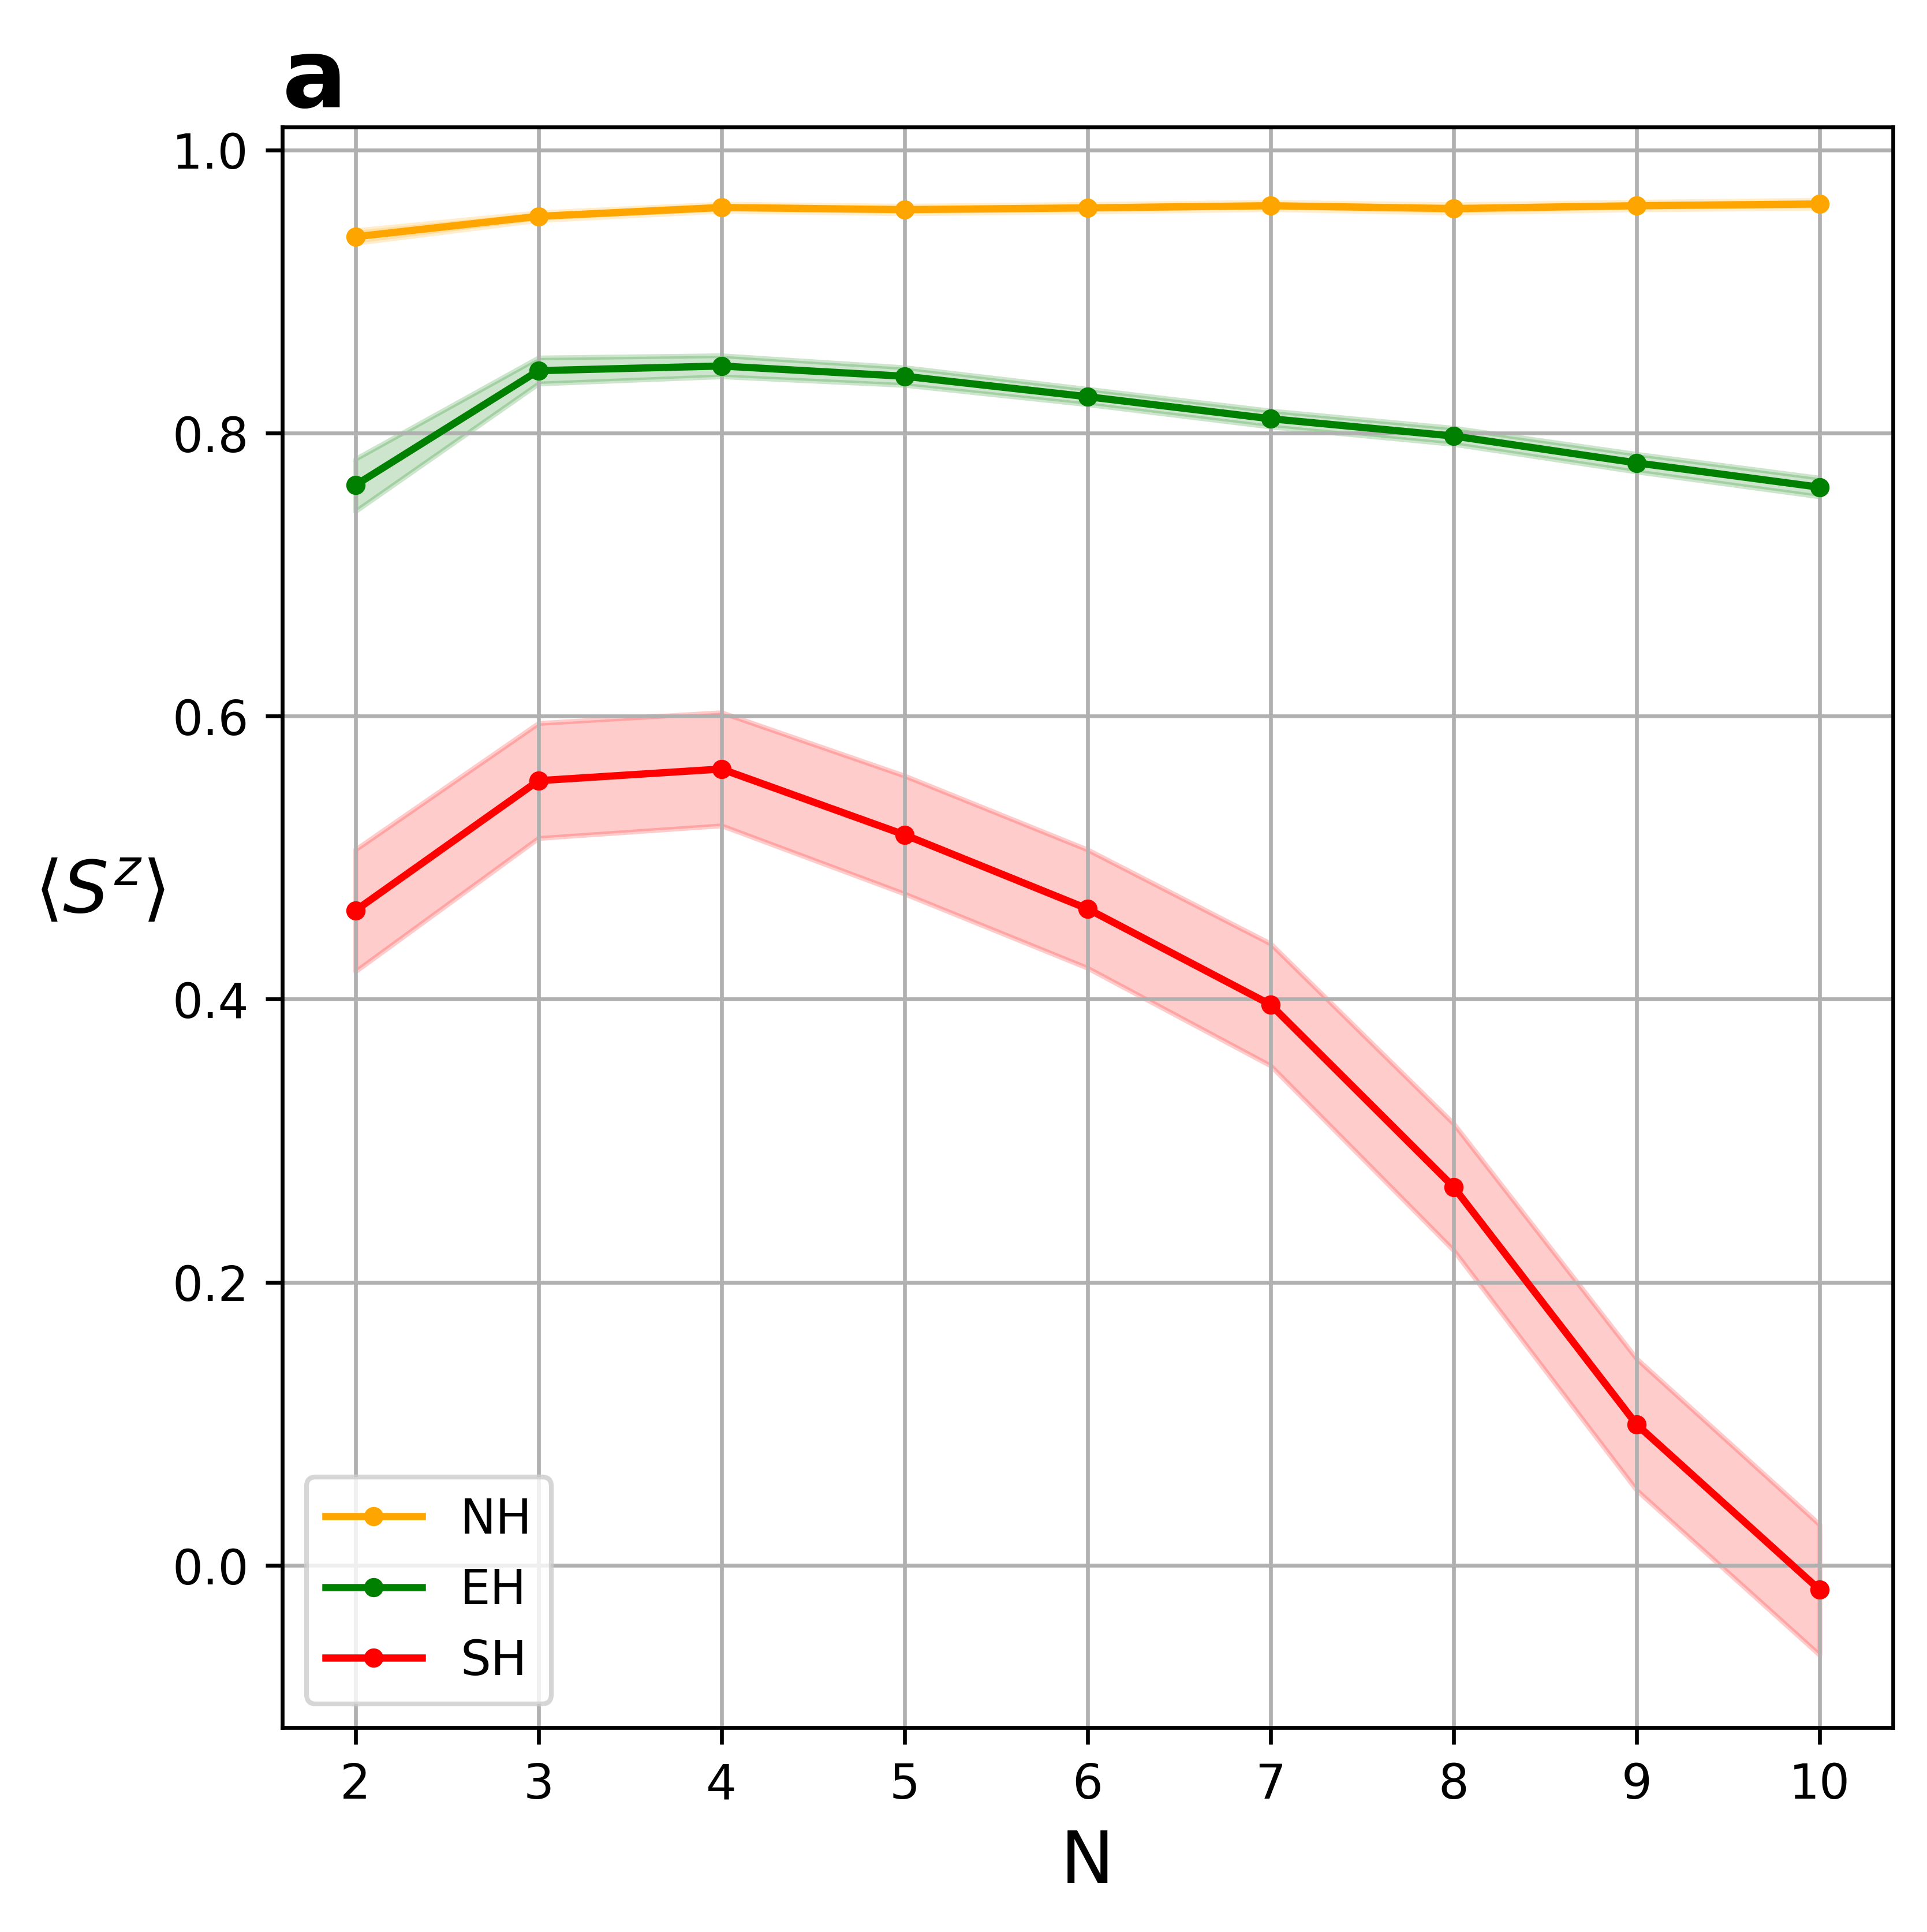

In [19]:
plt.figure(figsize=(6,6), dpi=600)

plt.plot([2,3,4,5,6,7,8,9,10], NH_avg, color='orange', marker='.', label='NH')
plt.fill_between([2,3,4,5,6,7,8,9,10], NH_avg - NH_std, NH_avg + NH_std, color='orange', alpha = 0.2)

plt.plot([2,3,4,5,6,7,8,9,10], AR_avg, color='green', marker='.', label='EH')
plt.fill_between([2,3,4,5,6,7,8,9,10], AR_avg - AR_std, AR_avg + AR_std, color='green', alpha = 0.2)

plt.plot([2,3,4,5,6,7,8,9,10], SH_avg, color='red', marker='.', label='SH')
plt.fill_between([2,3,4,5,6,7,8,9,10], SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)

plt.xlabel(r'N', fontsize=15)
plt.ylabel(r'$\langle S^z \rangle$', fontsize=15, rotation=0, labelpad=15)

plt.title('a', fontdict=title_font, loc='left', pad=-5)
plt.legend()
plt.grid()

#plt.savefig('Fig6_a.png', bbox_inches = 'tight')
#plt.savefig('Fig6_a.pdf', bbox_inches = 'tight')

## $\alpha=0.3, 0.5,$ and  $0.7$

In [21]:
config = 'SH'

NH_avg = []
NH_std = []
alpha = 0.3
for N in [3,4,5,6,7]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  NH_avg.append(lst[-1, :, :,2].mean(1).mean())
  NH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))
    
AR_avg = []
AR_std = []
alpha = 0.5
for N in [3,4,5,6,7]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  AR_avg.append(lst[-1, :, :,2].mean(1).mean())
  AR_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

SH_avg = []
SH_std = []
alpha = 0.7
for N in [3,4,5,6,7]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

In [22]:
NH_avg = np.array(NH_avg)
NH_std = np.array(NH_std)

AR_avg = np.array(AR_avg)
AR_std = np.array(AR_std)

SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

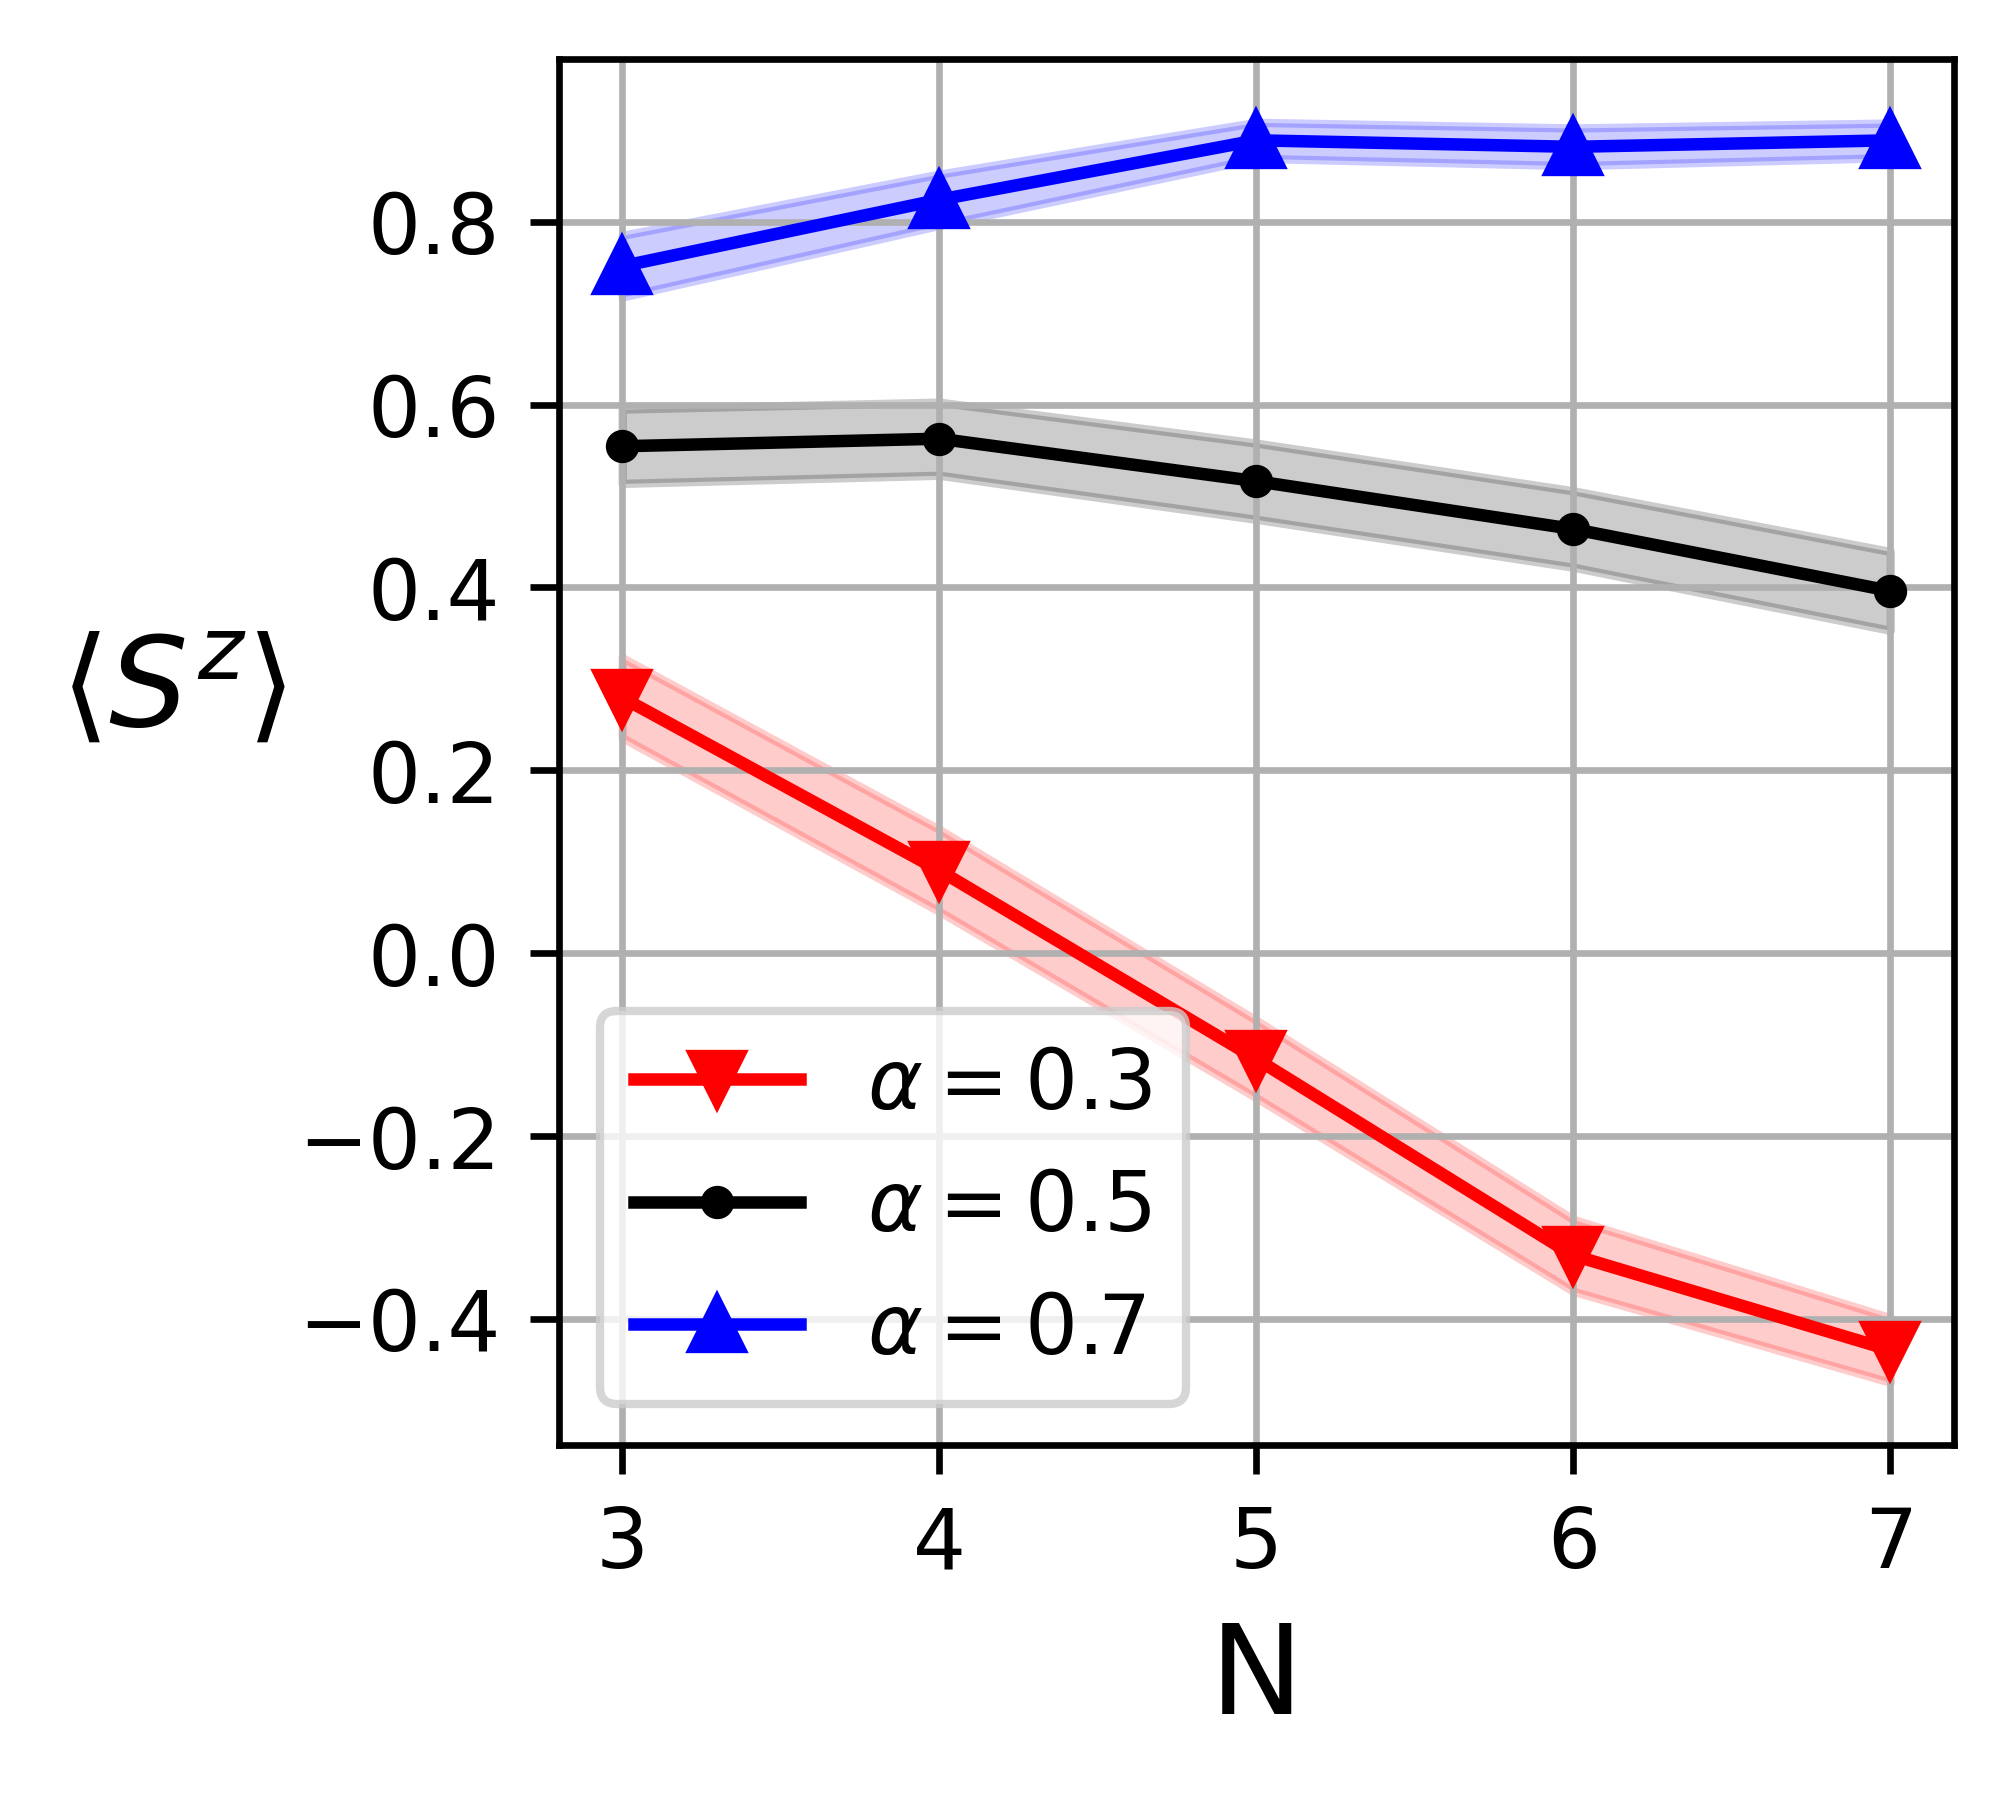

In [25]:
plt.figure(figsize=(3,3), dpi=600)

plt.plot([3,4,5,6,7], NH_avg, color='red', marker='v', label=r'$\alpha=0.3$')
plt.fill_between([3,4,5,6,7], NH_avg - NH_std, NH_avg + NH_std, color='red', alpha = 0.2)

plt.plot([3,4,5,6,7], AR_avg, color='black', marker='.', label=r'$\alpha=0.5$')
plt.fill_between([3,4,5,6,7], AR_avg - AR_std, AR_avg + AR_std, color='black', alpha = 0.2)

plt.plot([3,4,5,6,7], SH_avg, color='blue', marker='^', label=r'$\alpha=0.7$')
plt.fill_between([3,4,5,6,7], SH_avg - SH_std, SH_avg + SH_std, color='blue', alpha = 0.2)

plt.xlabel(r'N', fontsize=15)
plt.ylabel(r'$\langle S^z \rangle$', fontsize=15, rotation=0, labelpad=15)

plt.legend()
plt.grid()